# Coding Practice
## About Data
### Documentation about data
---

## Data Import
- The data is already cleaned

In [1]:
import pandas as pd, numpy as np
df = pd.read_csv("ML_DATA_165_Cleaned.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024460 entries, 0 to 1024459
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1024460 non-null  int64 
 1   MEDICAL_UNIT          1024460 non-null  int64 
 2   SEX                   1024460 non-null  int64 
 3   PATIENT_TYPE          1024460 non-null  int64 
 4   PNEUMONIA             1024460 non-null  int64 
 5   AGE                   1024460 non-null  int64 
 6   DIABETES              1024460 non-null  int64 
 7   COPD                  1024460 non-null  int64 
 8   ASTHMA                1024460 non-null  int64 
 9   INMSUPR               1024460 non-null  int64 
 10  HIPERTENSION          1024460 non-null  int64 
 11  OTHER_DISEASE         1024460 non-null  int64 
 12  CARDIOVASCULAR        1024460 non-null  int64 
 13  OBESITY               1024460 non-null  int64 
 14  RENAL_CHRONIC         1024460 non-null  int64 
 15

Machine Learning Problem Formulation:
- Classification final (Make it numerical from object)
- Classification (Pneumonia)
- Classifcation (Hypertension)
- Grouping some binary values (about heart diseases like Cardiovascular, Obesity, Renal_chronic, Tobacco)
- Classification (Patient_type)

In [3]:
# Feature Expansion (Feature Engineering)
df['HEART_DISEASE'] =  df['HIPERTENSION'].astype("string") +\
    df['OBESITY'].astype("string") +\
    df['TOBACCO'].astype("string")

In [4]:
df['HEART_DISEASE'].value_counts()

HEART_DISEASE
222    701196
122    104108
212     95343
221     53531
112     41190
211     15062
121      8707
111      5323
Name: count, dtype: Int64

In [5]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'AGE',
       'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL', 'HEART_DISEASE'],
      dtype='object')

In [6]:
df.sample(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,HEART_DISEASE
424448,2,10,1,2,2,23,2,2,2,2,2,2,2,2,2,2,NEG,222
479758,2,12,1,1,2,90,2,2,2,2,2,2,2,2,2,2,POS,222
512344,1,12,2,2,1,52,1,2,2,2,1,2,2,2,2,2,POS,122
763609,2,12,1,1,2,55,2,2,2,2,2,2,2,2,2,2,NEG,222
805765,1,12,2,1,2,45,2,2,2,2,1,2,2,1,2,2,NEG,112
1007927,2,12,1,1,2,22,2,2,2,2,2,2,2,2,2,2,NEG,222
908504,1,12,2,1,2,29,2,2,2,2,2,2,2,2,2,2,NEG,222
595141,2,12,2,1,2,51,2,2,2,2,2,2,2,2,2,2,POS,222
556492,1,12,1,1,2,32,2,2,2,2,2,2,2,2,2,2,POS,222
345999,1,6,1,1,2,21,2,2,2,2,2,2,2,2,2,2,POS,222


- The machine learning problem is classification based on the heart disease encoded "Grouping some binary values (about heart diseases like Cardiovascular, Obesity, Renal_chronic, Tobacco)"

Q&A:
    - Multicollinearity: ...

In [7]:
X,y = df.drop('HEART_DISEASE', axis=1), df['HEART_DISEASE']
X['CLASIFFICATION_FINAL'] = X['CLASIFFICATION_FINAL'].map({'POS':2,'NEG':1})

## Feature Normalization & Train/Test Split

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

NEW_X = X[['HIPERTENSION','OBESITY']] # We tried a new X here
X_train, X_test, y_train, y_test = train_test_split(NEW_X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42, # for reproducibility
                                                    shuffle=True)
S = StandardScaler()
X_train_scaled = S.fit_transform(X_train) # fit & transform 
X_test_scaled = S.transform(X_test)

Next Options:
- Cross-Validation
- Regularization
- PCA
- Model

> PCA (Dimension to 3d)
> Select the best model
> Regularization, Cross-Validation and Model in Same step

# PCA

In [9]:
from sklearn.decomposition import PCA,KernelPCA
DR_3d = PCA(n_components=3) # 3D > Linear
DR_2d = PCA(n_components=2) # 2D > Linear
DR_2d_Components = DR_2d.fit_transform(X_train_scaled)

In [10]:
DR_2d_Components_DF = pd.DataFrame(DR_2d_Components,columns=['PC1','PC2'])

In [11]:
np.sort(y_train.value_counts().index)

array(['111', '112', '121', '122', '211', '212', '221', '222'],
      dtype=object)

In [12]:
my_custom_cm = ['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo']

In [13]:
y_train_encoded = y_train.map({'111':0,
                               '112':1,
                               '121':2,
                               '122':3,
                               '211':4,
                               '212':5,
                               '221':6,'222':7})
y_test_encoded = y_test.map({'111':0,
                               '112':1,
                               '121':2,
                               '122':3,
                               '211':4,
                               '212':5,
                               '221':6,'222':7})


Text(0, 0.5, 'PC2')

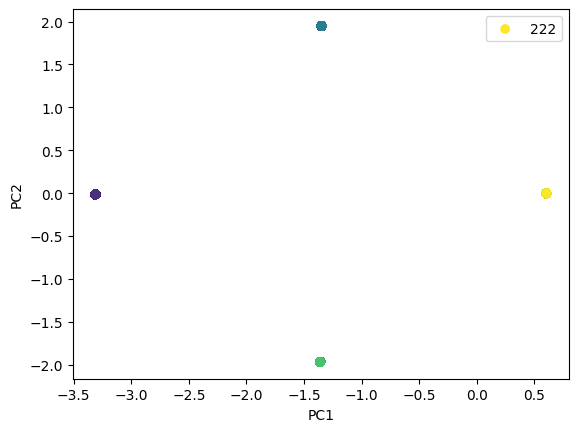

In [14]:
import matplotlib.pyplot as plt, seaborn as sb
plt.scatter(DR_2d_Components_DF['PC1'],
            DR_2d_Components_DF['PC2'],
            c=y_train_encoded)
plt.legend(np.array(y_train.value_counts().index)) # Need to have all legends
plt.xlabel("PC1")
plt.ylabel("PC2")

- From this chart, we can notice that the data is high dimensional and all 8 categories cannot be classified unless we use a high dimensional model
- Therefore, let's do ...

Next Options:

    - Option 1: Regularize the data once more using (ElasticNet) and perform PCA once more.
    - Option 2: Apply a high dimensional model and include (Regularization and Cross-Validation)

# Let's add penalty

In [15]:
from sklearn.linear_model import ElasticNetCV

We should calculate Lambda Max and its number should be adopted in the alphas
- All lambdas used in regularizer should be a dividable number by Lambda Max 

In [16]:
n = X_train_scaled.shape[0]

In [17]:
lambda_max = np.abs(X_train_scaled.T.dot(y_train_encoded)).max()/n
lambdas = np.logspace( # Points dividable by lambda_max
    np.log10(lambda_max * 10),
    np.log10(lambda_max * 0.1),
    100
)
l1_ratio = [.9]

In [18]:
ENCV = ElasticNetCV(alphas=lambdas,
                    l1_ratio = l1_ratio,
                    cv = 5)
ENCV.fit(X_train_scaled,y_train_encoded)

ElasticNetCV(alphas=array([15.71591866, 15.0016059 , 14.31975976, 13.66890458, 13.04763177,
       12.45459677, 11.88851613, 11.34816472, 10.83237312, 10.34002504,
        9.87005495,  9.42144572,  8.99322647,  8.58447045,  8.19429302,
        7.82184975,  7.46633461,  7.12697818,  6.80304602,  6.49383708,
        6.19868216,  5.91694249,  5.64800832,  5.39129763,  5.14625483,
        4.91234961,  4.68907573,  4.47595001,  4.2725...
        0.76420251,  0.72946833,  0.69631286,  0.66466437,  0.63445435,
        0.60561742,  0.57809117,  0.55181604,  0.52673515,  0.50279422,
        0.47994145,  0.45812737,  0.43730477,  0.4174286 ,  0.39845582,
        0.38034539,  0.3630581 ,  0.34655655,  0.33080502,  0.31576942,
        0.30141722,  0.28771734,  0.27464014,  0.26215732,  0.25024187,
        0.23886799,  0.22801107,  0.21764762,  0.2077552 ,  0.1983124 ,
        0.1892988 ,  0.18069487,  0.17248201,  0.16464244,  0.15715919]),
             cv=5, l1_ratio=[0.9])

In [19]:
ENCV.coef_
coef = pd.Series(ENCV.coef_, index=pd.DataFrame(X_train_scaled,columns=X_train.columns).columns)

In [20]:
coef

HIPERTENSION    1.308356
OBESITY         0.613330
dtype: float64

# Model + CV + Regularization

In [21]:
# Multiclass Logistic Regression or Random Forest or SVM

In [29]:
from sklearn.svm import SVC # Support Vector Machine
from sklearn.ensemble import RandomForestClassifier
model = SVC()
model = RandomForestClassifier()
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train_scaled, y_train_encoded, cv=5) # Measure cross validation score (Accuracy for each subset)

array([0.91939066, 0.91939066, 0.91939066, 0.91939627, 0.91939627])

In [24]:
model.fit(X_train_scaled,y_train_encoded)

RandomForestClassifier()

In [25]:
y_pred = model.predict(X_test_scaled)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test_encoded, y_pred)

0.9191769322374714

In [27]:
print(classification_report(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1019
           1       0.89      1.00      0.94      8329
           2       0.00      0.00      0.00      1747
           3       0.92      1.00      0.96     20825
           4       0.00      0.00      0.00      3089
           5       0.86      1.00      0.92     18961
           6       0.00      0.00      0.00     10705
           7       0.93      1.00      0.96    140217

    accuracy                           0.92    204892
   macro avg       0.45      0.50      0.47    204892
weighted avg       0.85      0.92      0.88    204892



a:\anaconda3_23.7.3\envs\mitocluster\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
a:\anaconda3_23.7.3\envs\mitocluster\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
a:\anaconda3_23.7.3\envs\mitocluster\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

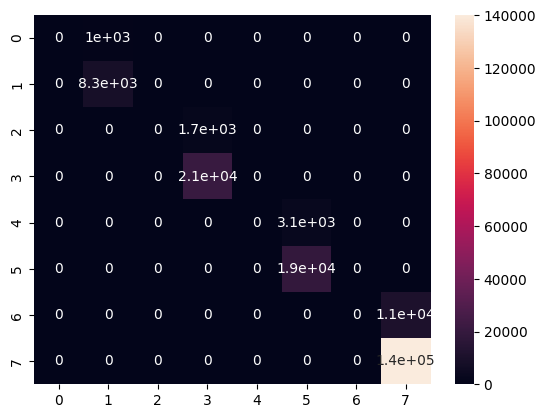

In [33]:
sb.heatmap(confusion_matrix(y_test_encoded, y_pred),annot=True)

# REDO All Steps (PCA and After) with another X

## Feature Normalization & Train/Test Split

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

NEW_X = X[['HIPERTENSION','OBESITY']] # We tried a new X here
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42, # for reproducibility
                                                    shuffle=True)
S = StandardScaler()
X_train_scaled = S.fit_transform(X_train) # fit & transform 
X_test_scaled = S.transform(X_test)

Next Options:
- Cross-Validation
- Regularization
- PCA
- Model

> PCA (Dimension to 3d)
> Select the best model
> Regularization, Cross-Validation and Model in Same step

# PCA

In [36]:
from sklearn.decomposition import PCA,KernelPCA
DR_3d = PCA(n_components=3) # 3D > Linear
DR_2d = PCA(n_components=2) # 2D > Linear
DR_2d_Components = DR_2d.fit_transform(X_train_scaled)

In [37]:
DR_2d_Components_DF = pd.DataFrame(DR_2d_Components,columns=['PC1','PC2'])

In [38]:
np.sort(y_train.value_counts().index)

array(['111', '112', '121', '122', '211', '212', '221', '222'],
      dtype=object)

In [39]:
my_custom_cm = ['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo']

In [40]:
y_train_encoded = y_train.map({'111':0,
                               '112':1,
                               '121':2,
                               '122':3,
                               '211':4,
                               '212':5,
                               '221':6,'222':7})
y_test_encoded = y_test.map({'111':0,
                               '112':1,
                               '121':2,
                               '122':3,
                               '211':4,
                               '212':5,
                               '221':6,'222':7})


Text(0, 0.5, 'PC2')

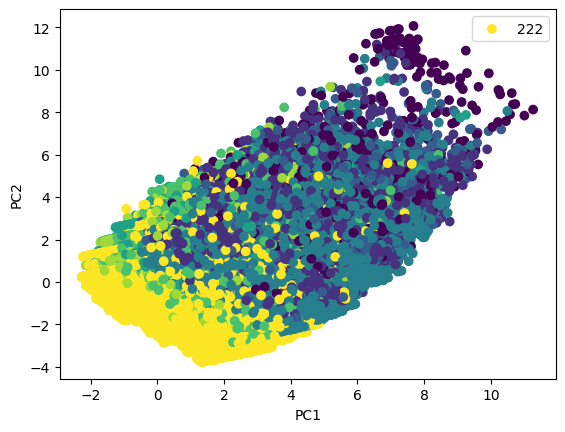

In [41]:
import matplotlib.pyplot as plt, seaborn as sb
plt.scatter(DR_2d_Components_DF['PC1'],
            DR_2d_Components_DF['PC2'],
            c=y_train_encoded)
plt.legend(np.array(y_train.value_counts().index)) # Need to have all legends
plt.xlabel("PC1")
plt.ylabel("PC2")

- From this chart, we can notice that the data is high dimensional and all 8 categories cannot be classified unless we use a high dimensional model
- Therefore, let's do ...

Next Options:

    - Option 1: Regularize the data once more using (ElasticNet) and perform PCA once more.
    - Option 2: Apply a high dimensional model and include (Regularization and Cross-Validation)

# Let's add penalty

In [42]:
from sklearn.linear_model import ElasticNetCV

We should calculate Lambda Max and its number should be adopted in the alphas
- All lambdas used in regularizer should be a dividable number by Lambda Max 

In [43]:
n = X_train_scaled.shape[0]

In [44]:
lambda_max = np.abs(X_train_scaled.T.dot(y_train_encoded)).max()/n
lambdas = np.logspace( # Points dividable by lambda_max
    np.log10(lambda_max * 10),
    np.log10(lambda_max * 0.1),
    100
)
l1_ratio = [.9]

In [45]:
ENCV = ElasticNetCV(alphas=lambdas,
                    l1_ratio = l1_ratio,
                    cv = 5)
ENCV.fit(X_train_scaled,y_train_encoded)

ElasticNetCV(alphas=array([15.71591866, 15.0016059 , 14.31975976, 13.66890458, 13.04763177,
       12.45459677, 11.88851613, 11.34816472, 10.83237312, 10.34002504,
        9.87005495,  9.42144572,  8.99322647,  8.58447045,  8.19429302,
        7.82184975,  7.46633461,  7.12697818,  6.80304602,  6.49383708,
        6.19868216,  5.91694249,  5.64800832,  5.39129763,  5.14625483,
        4.91234961,  4.68907573,  4.47595001,  4.2725...
        0.76420251,  0.72946833,  0.69631286,  0.66466437,  0.63445435,
        0.60561742,  0.57809117,  0.55181604,  0.52673515,  0.50279422,
        0.47994145,  0.45812737,  0.43730477,  0.4174286 ,  0.39845582,
        0.38034539,  0.3630581 ,  0.34655655,  0.33080502,  0.31576942,
        0.30141722,  0.28771734,  0.27464014,  0.26215732,  0.25024187,
        0.23886799,  0.22801107,  0.21764762,  0.2077552 ,  0.1983124 ,
        0.1892988 ,  0.18069487,  0.17248201,  0.16464244,  0.15715919]),
             cv=5, l1_ratio=[0.9])

In [46]:
ENCV.coef_
coef = pd.Series(ENCV.coef_, index=pd.DataFrame(X_train_scaled,columns=X_train.columns).columns)

In [47]:
coef

USMER                   0.000000
MEDICAL_UNIT            0.000000
SEX                    -0.000000
PATIENT_TYPE           -0.000000
PNEUMONIA               0.000000
AGE                    -0.000000
DIABETES                0.000000
COPD                    0.000000
ASTHMA                  0.000000
INMSUPR                 0.000000
HIPERTENSION            1.308377
OTHER_DISEASE           0.000000
CARDIOVASCULAR          0.000000
OBESITY                 0.602811
RENAL_CHRONIC           0.000000
TOBACCO                 0.139335
CLASIFFICATION_FINAL   -0.000000
dtype: float64

# Model + CV + Regularization

In [48]:
# Multiclass Logistic Regression or Random Forest or SVM

In [49]:
from sklearn.svm import SVC # Support Vector Machine
model = SVC()

In [50]:
model.fit(X_train_scaled,y_train_encoded) # Takes too much time

: 

: 

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test_encoded, y_pred)

1.0

In [ ]:
print(classification_report(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1019
           1       1.00      1.00      1.00      8329
           2       1.00      1.00      1.00      1747
           3       1.00      1.00      1.00     20825
           4       1.00      1.00      1.00      3089
           5       1.00      1.00      1.00     18961
           6       1.00      1.00      1.00     10705
           7       1.00      1.00      1.00    140217

    accuracy                           1.00    204892
   macro avg       1.00      1.00      1.00    204892
weighted avg       1.00      1.00      1.00    204892



<Axes: >

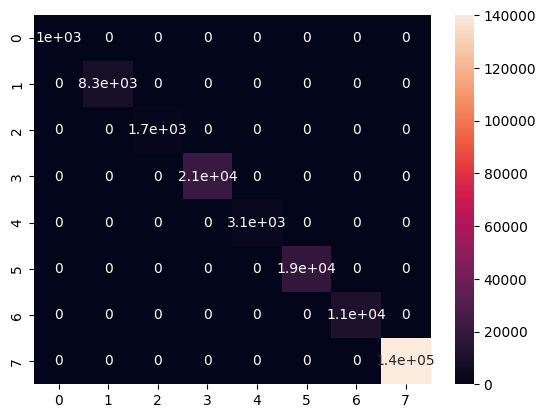

In [ ]:
sb.heatmap(confusion_matrix(y_test_encoded, y_pred),annot=True)